# Setup

In [1]:
# import your standard packages
%run ../pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters and Paths

In [2]:
outfn = '../../data/coastal_mask.nc'

# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

# regional 
bounds_wAS = [51.125,66,12.5,28]
bounds_eAS = [66,79,3,28]
bounds_wBoB = [79,87,2,28]
bounds_eBoB = [87,103,-5,28]

# Get Data

In [3]:
ds_WOA = xr.open_dataset('../../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                    (lat: 35, lon: 55, month: 12, pres: 57)
Coordinates:
  * month                      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * pres                       (pres) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                        (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                        (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
Data variables:
    temp                       (month, pres, lat, lon) float64 ...
    psal                       (month, pres, lat, lon) float64 ...
    doxy                       (month, pres, lat, lon) float64 ...
    nitrate                    (month, pres, lat, lon) float64 ...
    phosphate                  (month, pres, lat, lon) float64 ...
    sal                        (month, pres, lat, lon) float64 ...
    temp_40_200                (month, lat, lon) float64 ...
    doxy_40_200                (month, lat, lon) float64 ...
    psal_40_200                (month, lat, lon) float64

In [4]:
ds_WOD = xr.open_dataset('../../data/wod_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:           (pres: 57, time: 314731)
Coordinates:
  * time              (time) datetime64[ns] 1770-01-01 1770-01-01 ... 2020-05-31
  * pres              (pres) int64 0 5 10 15 20 25 ... 1300 1350 1400 1450 1500
Data variables:
    temp              (time, pres) float64 ...
    sal               (time, pres) float64 ...
    doxy              (time, pres) float64 ...
    nitrate           (time, pres) float64 ...
    phosphate         (time, pres) float64 ...
    lat               (time) float32 ...
    lon               (time) float32 ...
    temp_40_200       (time) float64 ...
    doxy_40_200       (time) float64 ...
    sal_40_200        (time) float64 ...
    nitrate_40_200    (time) float64 ...
    phosphate_40_200  (time) float64 ...
    temp_50_200       (time) float64 ...
    doxy_50_200       (time) float64 ...
    sal_50_200        (time) float64 ...
    nitrate_50_200    (time) float64 ...
    phosphate_50_200  (time) float64 ...
    temp_50_225    

# WOA

## Wide Shelf for eAS and eBoB

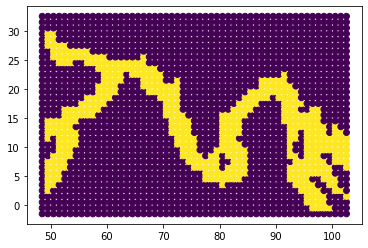

In [5]:
# wide shelf
xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

maskw = mask_coast_roobaert_wide(xx.flatten(),yy.flatten())
maskw = np.reshape(maskw,xx.shape)

plt.scatter(xx,yy, c = maskw)

## Narrow Shelf for wAS and wBoB

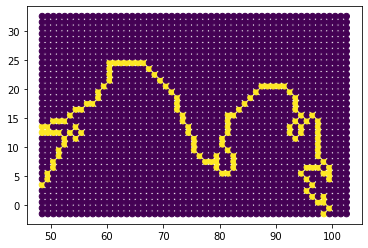

In [6]:
mask_tmp = ds_WOA.doxy_50_200[0,:,:]
lat = ds_WOA.lat
lon = ds_WOA.lon
xx,yy = np.meshgrid(lon,lat)

lat_inds, lon_inds = find_coast(np.array(mask_tmp))
maskn = np.full(mask_tmp.shape,False)
maskn[lat_inds,lon_inds] = True

lon_inds = np.array(lon_inds)
lat_inds = np.array(lat_inds)

plt.scatter(xx,yy, c = maskn)


In [7]:
ds_out=xr.Dataset()

# add to dataset
ds_out['cmaskw_woa'] = xr.DataArray(maskw,dims = ['lat_woa','lon_woa'],coords =[ds_WOA.lat,ds_WOA.lon])
# ds_out['cmaskw_woa_lon'] = xr.DataArray(xx[maskw],dims = ['coastal_pos_woa'],
#                                        coords =[np.arange(len(maskw[maskw]))])
# ds_out['ccmaskw_woa_lat'] = xr.DataArray(yy[maskw],dims = ['coastal_pos_woa'],
#                                         coords =[np.arange(len(maskw[maskw]))])

ds_out['cmaskn_woa'] = xr.DataArray(maskn,dims = ['lat_woa','lon_woa'],coords =[ds_WOA.lat,ds_WOA.lon])
# ds_out['cmaskn_woa_lon'] = xr.DataArray(xx[maskn],dims = ['coastal_pos_woa'],
#                                        coords =[np.arange(len(maskn[maskn]))])
# ds_out['cmaskn_woa_lat'] = xr.DataArray(yy[maskn],dims = ['coastal_pos_woa'],
#                                         coords =[np.arange(len(maskn[maskn]))])

ds_out['coastal_mask_bounds'] = xr.DataArray([lon_bounds[0],lon_bounds[1],lat_bounds[0],lat_bounds[1]],
                                             dims = ['lonmin,lonmax,latmin,latmax'],
                                             coords =[np.arange(4)])

ds_out

<xarray.Dataset>
Dimensions:                      (lat_woa: 35, lon_woa: 55, lonmin,lonmax,latmin,latmax: 4)
Coordinates:
  * lat_woa                      (lat_woa) float32 -1.5 -0.5 0.5 ... 31.5 32.5
  * lon_woa                      (lon_woa) float32 48.5 49.5 ... 101.5 102.5
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    cmaskw_woa                   (lat_woa, lon_woa) bool False False ... False
    cmaskn_woa                   (lat_woa, lon_woa) bool False False ... False
    coastal_mask_bounds          (lonmin,lonmax,latmin,latmax) float64 48.5 ... 33.0

# WOD

## Wide Shelf for eAS and eBoB

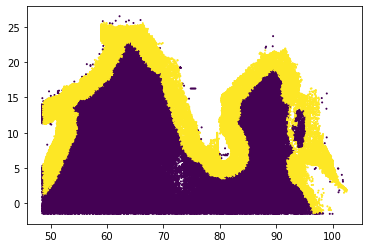

In [8]:
xx,yy = np.array(ds_WOD.lon),np.array(ds_WOD.lat)

maskw = mask_coast_roobaert_wide(xx,yy)

plt.scatter(xx,yy, c = maskw, s = 1)

## Narrow Shelf for wAS and wBoB

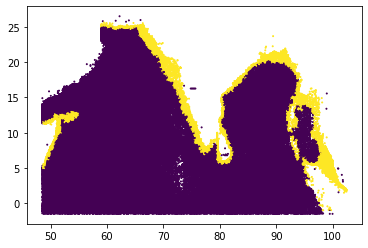

In [9]:
maskn = mask_coast_roobaert_narrow(xx,yy)
plt.scatter(xx,yy, c = maskn, s = 1)

In [10]:
ds_out['cmaskw_wod'] = xr.DataArray(maskw,dims = ['coastal_loc_wod'],
                                    coords =[np.arange(len(maskw))])
# ds_out['cmaskw_wod_xx'] = xr.DataArray(xx[maskw],dims = ['coastal_pos_wod'],
#                                        coords =[np.arange(len(maskw[maskw]))])
# ds_out['ccmaskw_wod_yy'] = xr.DataArray(yy[maskw],dims = ['coastal_pos_wod'],
#                                         coords =[np.arange(len(maskw[maskw]))])

ds_out['cmaskn_wod'] = xr.DataArray(maskn,dims = ['coastal_loc_wod'],
                                    coords =[np.arange(len(maskn))])
# ds_out['cmaskn_wod_xx'] = xr.DataArray(xx[maskn],dims = ['coastal_pos_wod'],
#                                        coords =[np.arange(len(maskn[maskn]))])
# ds_out['ccmaskn_wod_yy'] = xr.DataArray(yy[maskn],dims = ['coastal_pos_wod'],
#                                         coords =[np.arange(len(maskn[maskn]))])





In [11]:
ds_out

<xarray.Dataset>
Dimensions:                      (coastal_loc_wod: 314731, lat_woa: 35, lon_woa: 55, lonmin,lonmax,latmin,latmax: 4)
Coordinates:
  * lat_woa                      (lat_woa) float32 -1.5 -0.5 0.5 ... 31.5 32.5
  * lon_woa                      (lon_woa) float32 48.5 49.5 ... 101.5 102.5
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
  * coastal_loc_wod              (coastal_loc_wod) int64 0 1 2 ... 314729 314730
Data variables:
    cmaskw_woa                   (lat_woa, lon_woa) bool False False ... False
    cmaskn_woa                   (lat_woa, lon_woa) bool False False ... False
    coastal_mask_bounds          (lonmin,lonmax,latmin,latmax) float64 48.5 ... 33.0
    cmaskw_wod                   (coastal_loc_wod) bool True False ... False
    cmaskn_wod                   (coastal_loc_wod) bool False False ... False

# SAVE

In [12]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")

In [13]:
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# p = ds_WOA.doxy_50_200.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
#                                         cmap="PuOr_r",
#                                         vmax=100,vmin=0, # set colorbar lims
#                                         extend = 'both', # make a box colorbar rather than pointed
#                                         figsize = (12, 12),
#                                         cbar_kwargs={"label": "50-200dbar Oxygen"},
#                                         subplot_kws={'facecolor': 'gray'}
#                                        )

# for i, ax in enumerate(p.axes.flat):
#     ax.set_title(months[i])
#     ax.axes.axis('tight')
# #     plt.subplots_adjust(top=.9)

# p.set_xlabels('Longitude')
# p.set_ylabels('Latitude')

In [14]:
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# p = ds_WOA.nitrate_50_200.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
#                                         cmap="PuOr_r",
#                                         vmax=20,vmin=10, # set colorbar lims
#                                         extend = 'both', # make a box colorbar rather than pointed
#                                         figsize = (12, 12),
#                                         cbar_kwargs={"label": "50-200dbar Oxygen"},
#                                         subplot_kws={'facecolor': 'gray'}
#                                        )

# for i, ax in enumerate(p.axes.flat):
#     ax.set_title(months[i])
#     ax.axes.axis('tight')
# #     plt.subplots_adjust(top=.9)

# p.set_xlabels('Longitude')
# p.set_ylabels('Latitude')

In [15]:
# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# p = ds_WOA.phosphate_50_200.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
#                                         cmap="PuOr_r",
#                                         vmax=1,vmin=0.5, # set colorbar lims
#                                         extend = 'both', # make a box colorbar rather than pointed
#                                         figsize = (12, 12),
#                                         cbar_kwargs={"label": "50-200dbar Oxygen"},
#                                         subplot_kws={'facecolor': 'gray'}
#                                        )

# for i, ax in enumerate(p.axes.flat):
#     ax.set_title(months[i])
#     ax.axes.axis('tight')
# #     plt.subplots_adjust(top=.9)

# p.set_xlabels('Longitude')
# p.set_ylabels('Latitude')

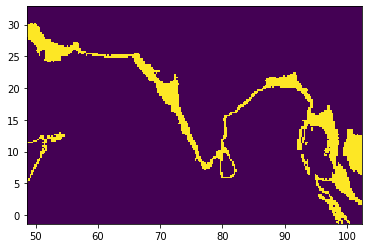

In [16]:
data=xr.open_dataset('/tigress/GEOCLIM/LRGROUP/shared_data/pco2_flux_coastal_Roobaert/mask_ocean.nc')

# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

mask = data.surface_mask_coastal1

# subset
lat_slice = slice(lat_bounds[0], lat_bounds[1])
lon_slice = slice(lon_bounds[0], lon_bounds[1])

mask = mask.sel(latitude = lat_slice, longitude = lon_slice)
lat=np.array(mask.latitude)
lon=np.array(mask.longitude)

mask = np.array(mask).astype(int).T

plt.pcolor(lon,lat,mask)

In [17]:
# https://www.pacioos.hawaii.edu/metadata/dist2coast_1deg_ocean.html#Distribution_Informationds_mask = xr.open_dataset('../../data/dist2coast_1deg_indian_ocean.nc')
ds_mask = xr.open_dataset('../../data/dist2coast_1deg_indian_ocean.nc')

In [18]:
# set land (negative values to nan)

mask_o = np.array(ds_mask.dist)
lon = np.array(ds_mask.lon)
lat = np.array(ds_mask.lat)
xx,yy = np.meshgrid(lon,lat)

mask,bincounts,latbins,lonbins = latlonbin(mask_o.flatten(),yy.flatten(),xx.flatten())

# mask, lat_woa, lon_woa = regrid_2_woa(mask_o,lat,lon)

../local_functions.py:706: RuntimeWarning: Mean of empty slice
  invar_binned_ave[i[0],j[0]] = np.nanmean(group.invar)


In [19]:
# make wide coast
maskw = np.array(mask)
maskw[maskw > 300] = np.nan


/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


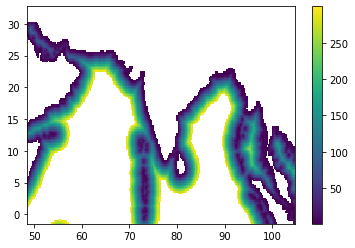

In [20]:
plt.pcolor(lonbins,latbins,maskw)
plt.colorbar()

In [21]:
maskn.shape, maskw.shape

((314731,), (138, 226))

In [46]:
maskn = np.array(mask)
maskn[maskn > 150] = np.nan

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


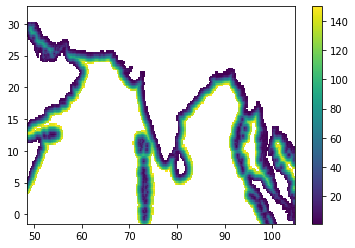

In [47]:
plt.pcolor(lonbins,latbins,maskn)
plt.colorbar()

In [48]:
ds_out=xr.Dataset()

# add to dataset
ds_out['maskw'] = xr.DataArray(maskw,dims = ['lat','lon'],coords =[latbins,lonbins])
ds_out['maskn'] = xr.DataArray(maskn,dims = ['lat','lon'],coords =[latbins,lonbins])

In [49]:
xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))
inlat = yy.flatten()
inlon = xx.flatten()

woa_maskw = mask_coast(inlat,inlon,ds_out.maskw)
woa_maskw = np.reshape(woa_maskw,xx.shape)

woa_maskn = mask_coast(inlat,inlon,ds_out.maskn)
woa_maskn = np.reshape(woa_maskn,xx.shape)


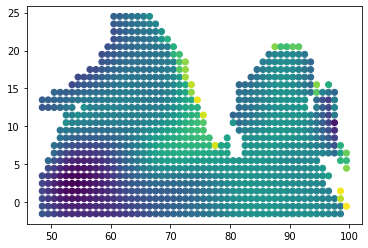

In [50]:
tmp = np.array(ds_WOA.temp_50_200[0,:,:])
plt.scatter(xx,yy,c = tmp)

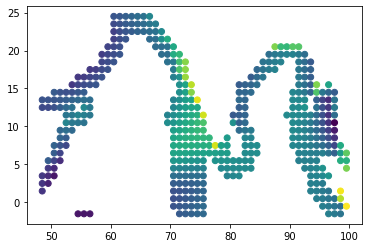

In [51]:
plt.scatter(xx[woa_maskw],yy[woa_maskw],c = tmp[woa_maskw])

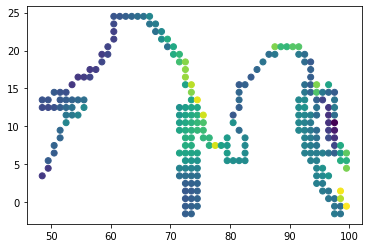

In [52]:
plt.scatter(xx[woa_maskn],yy[woa_maskn],c = tmp[woa_maskn])